# Name-SHIVESH CHANDRA
# REGISTRATION NUMBER-200968230
# LAB 3 EXERCISE 1

In [3]:
#Importing necessary libraries for performing data analysis using python
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency

In [4]:
#Importing the dataset
df = pd.read_excel('Cereals1.xls')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Data Preprocessing, Regression

In [5]:
#Q1. 5-number summary
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
#Q1. 5-number summary
data = {"min": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].min(),
        "First Quartile(Q1)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.25),
        "median": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].median(),
        "3rd Quartile(Q3)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.75),
        "max": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].max()
       }
new = pd.DataFrame(data=data)
new

,min,First Quartile(Q1),median,3rd Quartile(Q3),max
protein,1.0,2.00,2.50,3.0,6.0
fat,0.0,0.00,1.00,2.0,5.0
sodium,0.0,132.50,180.00,212.5,320.0
fiber,0.0,0.75,1.75,3.0,14.0
carbo,-1.0,12.00,14.50,17.0,23.0
sugars,-1.0,3.00,7.00,11.0,15.0
potass,-1.0,40.00,90.00,120.0,330.0
vitamins,0.0,25.00,25.00,25.0,100.0


In [7]:
#Q2. Replace all missing data(-1) with mean of the attribute
for i in df.columns:

    if(i == 'protein' or i == 'fat' or i == 'sodium' or i == 'fiber' or i == 'carbo' or i == 'sugars' or i =='potass' or i == 'vitamins'):

        mean = df[i].mean()

        df[i].replace(to_replace=-1, value=mean, inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [8]:
#Q3.Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective? 
summary_new = df.describe()
summary_new

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [9]:
data = {"min": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].min(),
        "First Quartile(Q1)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.25),
        "median": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].median(),
        "3rd Quartile(Q3)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.75),
        "max": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].max()
       }
new = pd.DataFrame(data=data)
new

,min,First Quartile(Q1),median,3rd Quartile(Q3),max
protein,1.0,2.00,2.500000,3.0,6.0
fat,0.0,0.00,1.000000,2.0,5.0
sodium,0.0,132.50,180.000000,212.5,320.0
fiber,0.0,0.75,1.750000,3.0,14.0
carbo,7.0,12.00,14.861842,17.0,23.0
sugars,0.0,3.00,7.000000,11.0,15.0
potass,15.0,43.75,90.000000,120.0,330.0
vitamins,0.0,25.00,25.000000,25.0,100.0


In [10]:
 print("Yes, I think the strategy used to deal with the missing values was effective. This is because we can safely assume the mean to be a suitable replacement for a missing data value and there is not much of a change in the distribution which shows the mean content of the various attributes in the serials is not so different")

Yes, I think the strategy used to deal with the missing values was effective. This is because we can safely assume the mean to be a suitable replacement for a missing data value and there is not much of a change in the distribution which shows the mean content of the various attributes in the serials is not so different


In [11]:
#Q4. Identify and replace all noisy data with the median of the attribute
for i in ['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']:

    iqr = summary_new[i]["75%"] - summary_new[i]["25%"]
    
    lower_bound =summary_new[i]["25%"] - (1.5 * iqr)

    upper_bound = summary_new[i]["75%"] + (1.5 * iqr)

    median = df[i].median()

    df.loc[(df[i] < lower_bound) | (df[i] > upper_bound), i] = median

In [12]:
#Q5.
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.500000,1.500000,93.704912


In [13]:
data = {"min": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].min(),
        "First Quartile(Q1)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.25),
        "median": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].median(),
        "3rd Quartile(Q3)": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].quantile(.75),
        "max": df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].max()
       }
new = pd.DataFrame(data=data)
new

,min,First Quartile(Q1),median,3rd Quartile(Q3),max
protein,1.0,2.00,2.250000,3.0,4.0
fat,0.0,0.00,1.000000,2.0,5.0
sodium,15.0,147.50,180.000000,212.5,320.0
fiber,0.0,0.75,1.625000,3.0,6.0
carbo,7.0,12.00,14.861842,17.0,23.0
sugars,0.0,3.00,7.000000,11.0,15.0
potass,15.0,43.75,90.000000,110.0,230.0
vitamins,25.0,25.00,25.000000,25.0,25.0


In [14]:
#Yes, the strategy was effective as the outliers were removed from the data.

# Use the prepared or preprocessed data to answer the following:

In [15]:
#Q1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer
pd.crosstab(df['mfr'], df['type'])

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


In [16]:
#Q2. Cereal with the best rating
best_rating = df['rating'].max()
df[df['rating'] == best_rating]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.0,0.0,90.0,25,3,1.0,0.5,93.704912


In [17]:
print("The cereal with the best rating is:All-Bran_with_Extra_Fiber ")

The cereal with the best rating is:All-Bran_with_Extra_Fiber 


In [18]:
#Q2. Cereal with the worst rating
worst_rating = df['rating'].min()
df[df['rating'] == worst_rating]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,Cap'n'Crunch,Q,C,120,1.0,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


In [19]:
print("The cereal with the worst rating is:Cap'n'Crunch")

The cereal with the worst rating is:Cap'n'Crunch


<AxesSubplot:xlabel='type', ylabel='rating'>

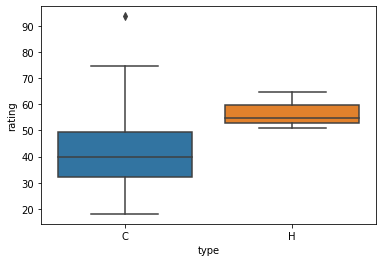

In [20]:
#Q3. side-by-side boxplot comparing the consumer rating of hot vs. cold cereals
sns.boxplot(x='type', y='rating', data=df)

In [21]:
#Q4. Relation between sugars, calories, carbs, and fat
rel = ['sugars', 'calories', 'carbo', 'fat']
df4 = df[rel]
df4.corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.574304,-0.501056,0.300349
calories,0.574304,1.000000,0.207615,0.510630
carbo,-0.501056,0.207615,1.000000,-0.312341
fat,0.300349,0.510630,-0.312341,1.000000


<AxesSubplot:>

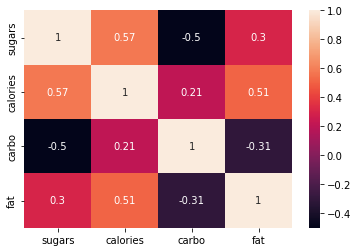

In [22]:
#Q4.
sns.heatmap(df4.corr(), annot = True)

In [23]:
# Seeing above we can see the relationship between sugars, calories, carbs and fat but all have low correlation

In [24]:
#Q5. Manufacturers producing cereals witht the highest calories
df[df['calories'] == df['calories'].max()].mfr.values[0]

'K'

In [25]:
print("The manufacturer which produces cereal with highest calories is: K")

The manufacturer which produces cereal with highest calories is: K


<AxesSubplot:>

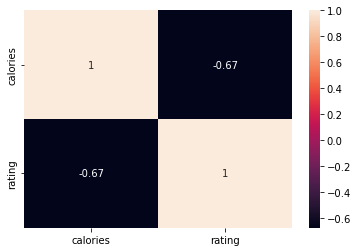

In [26]:
#Q6.Use correlation tests and visualization to identify if the two variables calories and consumer rating associated ?
rel2 = ['calories', 'rating']
df5 = df[rel2]
df5.corr()
sns.heatmap(df5.corr(),annot = True)

In [27]:
print(" A negative correlation of -0.67 implies that the two variables are inversely proportional to each other")

 A negative correlation of -0.67 implies that the two variables are inversely proportional to each other


In [28]:
#Q7. Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?
rel = list(['shelf','rating'])
df[rel].corr()

,shelf,rating
shelf,1.000000,0.001973
rating,0.001973,1.000000


<AxesSubplot:>

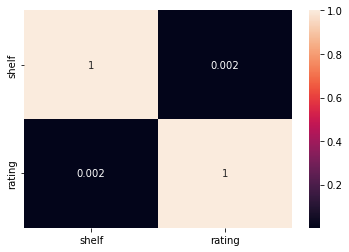

In [29]:
import seaborn as sns
rel2 = ['shelf', 'rating']
df5 = df[rel2]
df5.corr()
sns.heatmap(df5.corr(),annot = True)

In [30]:
 print("The correlation between the two is very close to zero,0.02. This implies that the two variables are not associated with each other.") 

The correlation between the two is very close to zero,0.02. This implies that the two variables are not associated with each other.


In [31]:
#Q8.Is there a relation between manufacturer and rating?
df.groupby("mfr").describe()["rating"][["mean"]]

,mean
mfr,
A,54.850917
G,34.485852
K,44.038462
N,67.881686
P,41.705744
Q,42.915990
R,41.542997


In [32]:
print("From this we can see that the manufacturer Nabisco usually has high rated cereals and that the manufacturer General Mills usually has low rated cereals. The mean rating for American Home Food Products is around 55 and  of Nabisco is arounf 68 while the rest of the manufacturers have a mean rating in the 40-45 range.")

From this we can see that the manufacturer Nabisco usually has high rated cereals and that the manufacturer General Mills usually has low rated cereals. The mean rating for American Home Food Products is around 55 and  of Nabisco is arounf 68 while the rest of the manufacturers have a mean rating in the 40-45 range.


<AxesSubplot:>

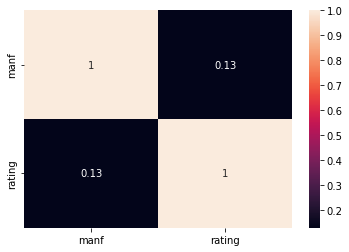

In [33]:
df['manf']=pd.factorize(df['mfr'])[0]
variety4=['manf','rating']
df7=df[variety4]
sns.heatmap(df7.corr(method='pearson'), annot = True)

In [34]:
print("we can also see that above heatmap indicates that overall correlation between manufacturer and rating is low,0.13")

we can also see that above heatmap indicates that overall correlation between manufacturer and rating is low,0.13


,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,calories
protein,1.000000,0.226913,-0.120710,0.587843,-0.016380,-0.226848,0.671223,NaN,0.466606,0.067832
fat,0.226913,1.000000,-0.248478,0.135546,-0.312341,0.300349,0.357217,NaN,-0.418439,0.510630
sodium,-0.120710,-0.248478,1.000000,-0.124328,0.444677,-0.288444,-0.157435,NaN,-0.050622,-0.031526
fiber,0.587843,0.135546,-0.124328,1.000000,-0.110386,-0.000373,0.792123,NaN,0.335319,0.106049
carbo,-0.016380,-0.312341,0.444677,-0.110386,1.000000,-0.501056,-0.095005,NaN,0.160481,0.207615
sugars,-0.226848,0.300349,-0.288444,-0.000373,-0.501056,1.000000,0.030380,NaN,-0.774390,0.574304
potass,0.671223,0.357217,-0.157435,0.792123,-0.095005,0.030380,1.000000,NaN,0.209746,0.256829
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,0.466606,-0.418439,-0.050622,0.335319,0.160481,-0.774390,0.209746,NaN,1.000000,-0.674336
calories,0.067832,0.510630,-0.031526,0.106049,0.207615,0.574304,0.256829,NaN,-0.674336,1.000000


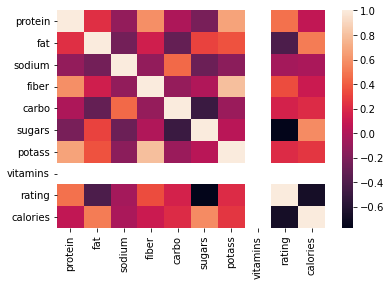

In [35]:
#Q9. Essential nutrients for good rating of the cereal
corr = df[['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'rating', 'calories']].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
corr

In [36]:
print(" From the correlation values and heat map that is given below we can see that for a good rating,a cereal should have a low amount of sugar and calories and a high amount of protein and fiber.")

 From the correlation values and heat map that is given below we can see that for a good rating,a cereal should have a low amount of sugar and calories and a high amount of protein and fiber.


In [37]:
#Q10. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 70, 30 split
for_model = df[['protein','sugars','calories','rating']]
for_model

,protein,sugars,calories,rating
0,3.0,8.0,120,33.983679
1,4.0,5.0,70,59.425505
2,4.0,0.0,50,93.704912
3,2.0,8.0,110,34.384843
4,2.0,10.0,110,29.509541
...,...,...,...,...
71,2.0,3.0,110,39.106174
72,1.0,12.0,110,27.753301
73,3.0,3.0,100,49.787445
74,3.0,3.0,100,51.592193


In [38]:
from sklearn.model_selection import train_test_split
X = for_model[['protein','sugars','calories']]
y = for_model['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred =reg.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

4.295135743266164

In [41]:
print(reg.score(X_test,y_test))

0.8339266080000717


In [42]:
print("accuracy is 83.39266080000717")

accuracy is 83.39266080000717


Plot of Predicted vs Actual values of rating on testing dataset:


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

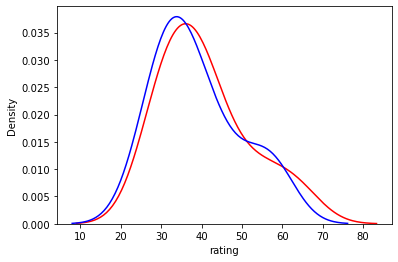

In [44]:
print("Plot of Predicted vs Actual values of rating on testing dataset:")
Yhat2 = reg.predict(X_test)
ax2 = sns.distplot(y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat2, hist = False, color = "b", label = "Fitted Values", ax = ax2)